In [25]:
import IPython
import sys
import numpy as np
import pandas as pd
import midi
import music21
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [3]:
data_path = "../midi/"
file_name = "99_miles_from_l_a-kar_rt.mid"

In [4]:
midi_obj = music21.converter.parse(data_path+file_name)
midi_obj

<music21.stream.Score 0x210828ae0a0>

In [5]:
def load_midi_file(file_path):
    return music21.converter.parse(file_path)

In [6]:
midi_obj = load_midi_file(data_path+file_name)

In [7]:
def list_instrument(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDIfile:")
    for p in partStream:
        aux = p 
        print(p.partName)

In [8]:
list_instrument(midi_obj)

List of instruments found on MIDIfile:
Melody
Strings
Strings
Choir
Piano
Guitar
Guitar
Guitar (Nylon)
Guitar (Nylon)
Bass
Drums
Pad (Warm)


In [27]:
def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:
        if isinstance(nt, music21.note.Note):
            ret.append(max(0,0,nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, music21.chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0,0,pitch.ps))
                parent_element.append(nt)
                
    return ret, parent_element

In [28]:
extract_note(midi_obj)

([67.0,
  48.0,
  59.0,
  64.0,
  36.0,
  60.0,
  36.0,
  35.0,
  42.0,
  67.0,
  64.0,
  60.0,
  59.0,
  42.0,
  42.0,
  42.0,
  59.0,
  67.0,
  60.0,
  64.0,
  59.0,
  37.0,
  42.0,
  42.0,
  64.0,
  42.0,
  31.0,
  35.0,
  42.0,
  60.0,
  59.0,
  67.0,
  64.0,
  55.0,
  36.0,
  35.0,
  42.0,
  42.0,
  57.0,
  36.0,
  42.0,
  42.0,
  67.0,
  64.0,
  60.0,
  59.0,
  59.0,
  37.0,
  42.0,
  42.0,
  43.0,
  64.0,
  55.0,
  42.0,
  42.0,
  42.0,
  67.0,
  64.0,
  59.0,
  60.0,
  36.0,
  48.0,
  36.0,
  35.0,
  42.0,
  42.0,
  42.0,
  42.0,
  64.0,
  67.0,
  59.0,
  60.0,
  59.0,
  37.0,
  42.0,
  42.0,
  64.0,
  42.0,
  36.0,
  35.0,
  42.0,
  59.0,
  67.0,
  60.0,
  64.0,
  55.0,
  36.0,
  35.0,
  42.0,
  42.0,
  57.0,
  42.0,
  42.0,
  67.0,
  59.0,
  64.0,
  60.0,
  59.0,
  37.0,
  42.0,
  42.0,
  48.0,
  64.0,
  55.0,
  42.0,
  36.0,
  42.0,
  42.0,
  67.0,
  48.0,
  59.0,
  64.0,
  36.0,
  60.0,
  36.0,
  35.0,
  42.0,
  67.0,
  64.0,
  60.0,
  59.0,
  42.0,
  42.0,
  42.0,
  59.0,


In [31]:
def print_parts_countour(midi):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,1,1)
    minPitch = music21.pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes
        y, parent_element = extract_notes(top)
        if (len(y)<1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x,y,alpha=0.6,s=7)
            
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
               
        aux = max(x)
        if(aux > xMax): xMax = aux
             
        for i in range(1,10):
            linePitch = music21.pitch.Pitch('C{0}'.format(i)).ps
            if (linePitch > minPitch and linePitch < maxPitch):
                ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))
                    
        plt.ylabel("Note index (each octave has 12 notes)")
        plt.xlabel("Number of quarter notes (beats)")
        plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
        plt.show()

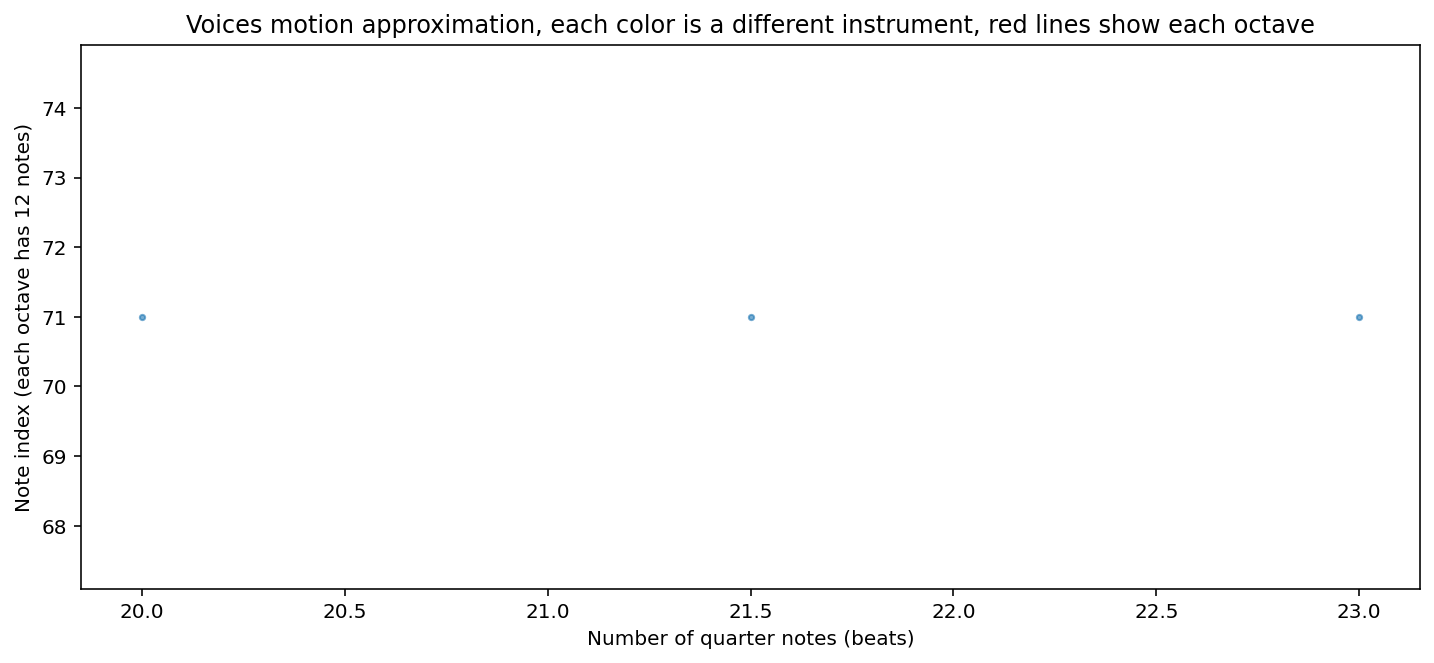

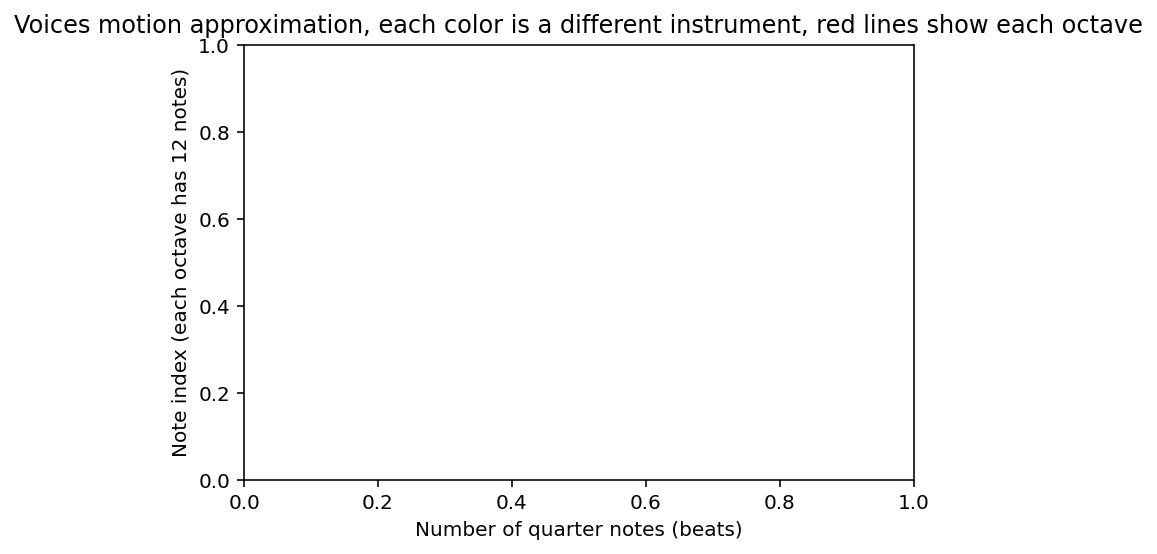

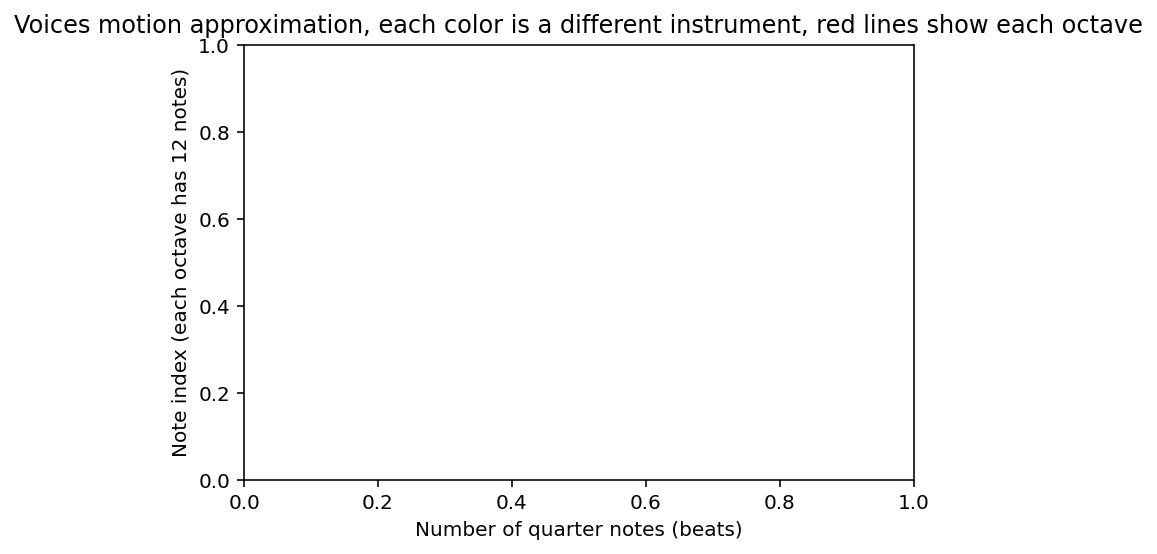

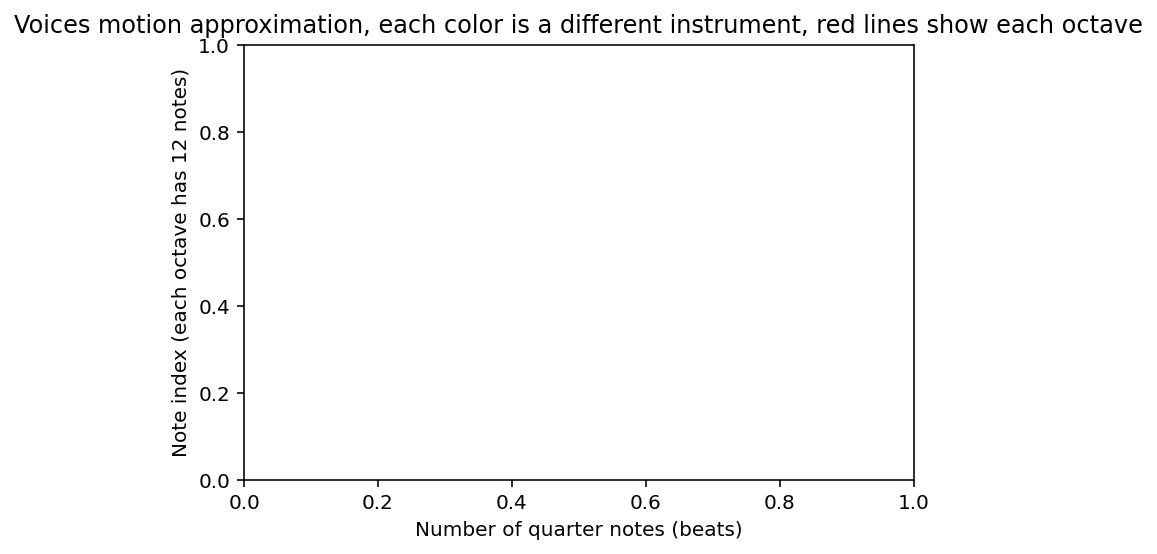

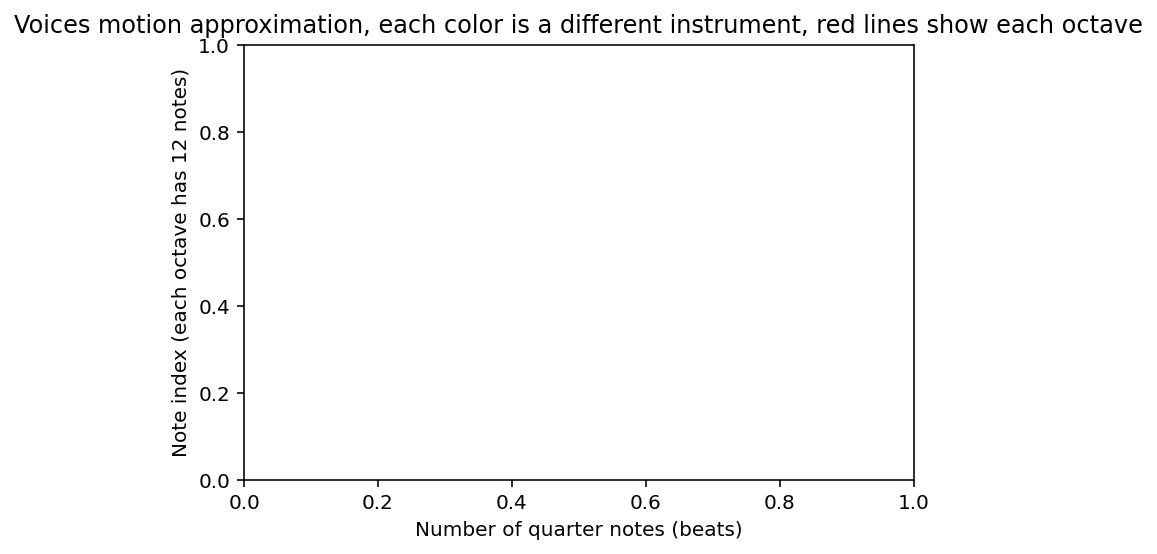

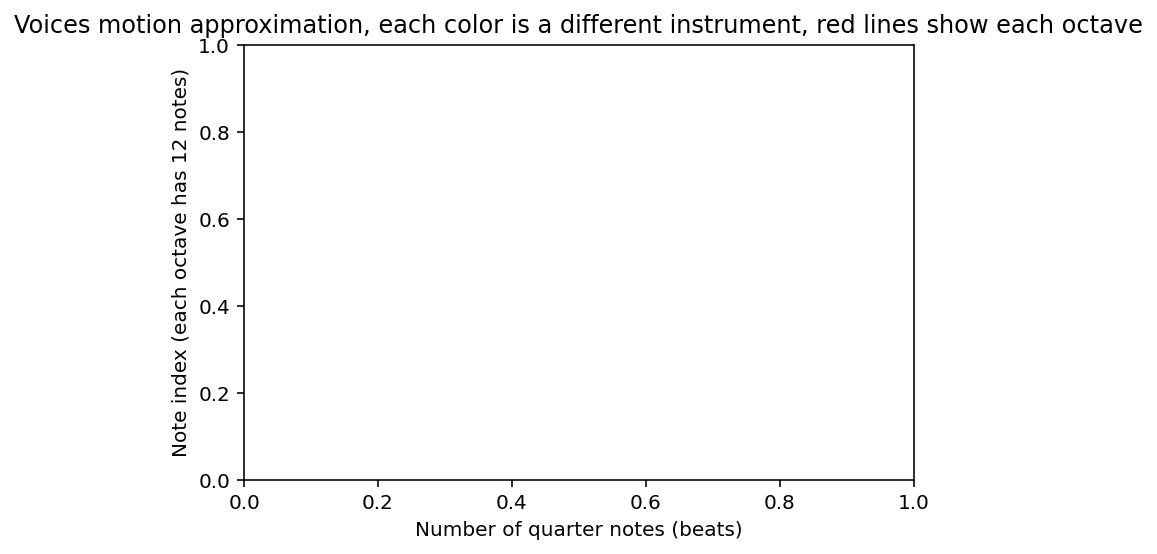

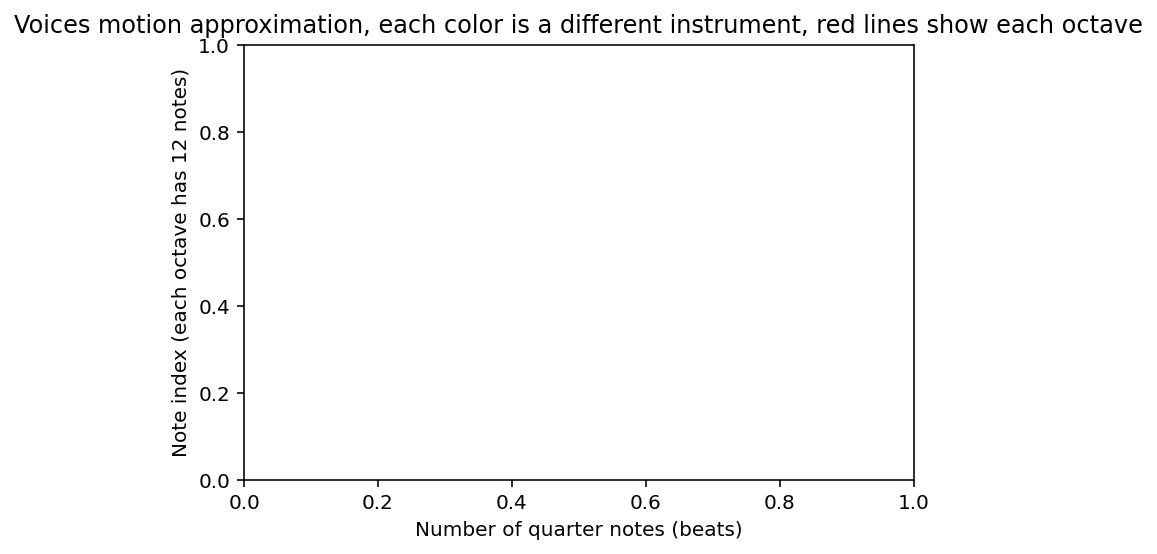

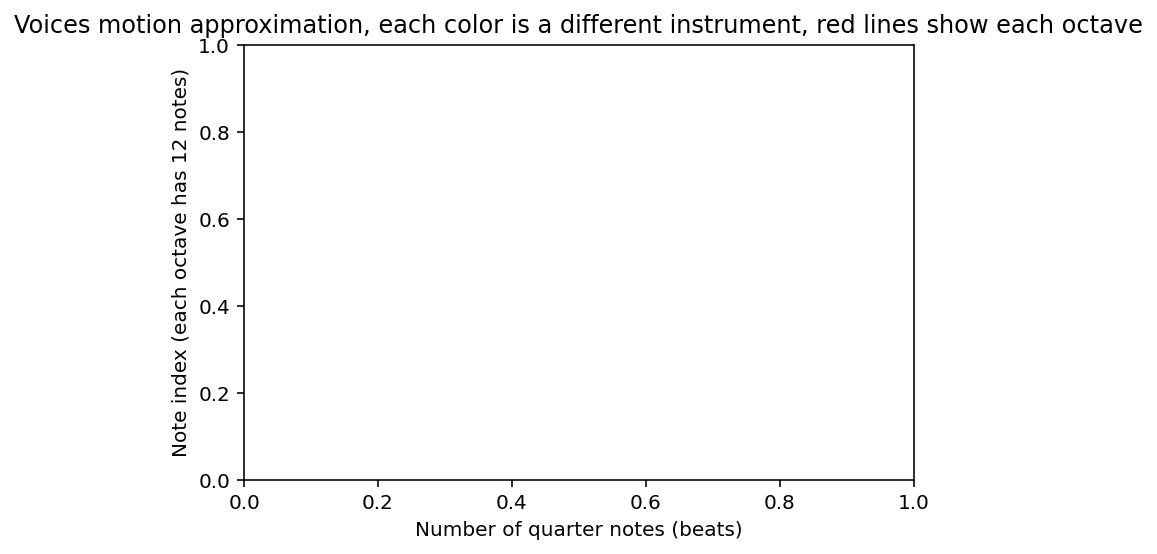

In [32]:
print_parts_countour(midi_obj.measures(0, 6))